# Leveraging Machine Learning to Combat Fake News: A Multi-Classifier Approach for Social Media News Verification

## Table of Contents

- [1. Introduction](#Introduction)
- [2. Importing Libraries](#Importing-Libraries)
- [3. Loading Dataset](#Loading-Dataset)
- [4. Data Cleaning and Feature Engineering](#Data-Cleaning-and-Feature-Engineering)
- [5. EDA](#EDA)
   - [5.1 Preprocessing](#Preprocessing)
   - [5.2 Analysis of News Title](#Analysis-of-News-Title)
      - [5.2.1 Fake News](#Fake-News)
      - [5.2.2 Real News](#Real-News)
      - [5.2.3 Concatenation and Visualization](#Concatenation-and-Visualization)
   - [5.3 Analysis of News Body](#Analysis-of-News-Body)
      - [5.3.1 Fake News](#Fake-News)
      - [5.3.2 Real News](#Real-News)
      - [5.3.3 Concatenation and Visualization](#Concatenation-and-Visualization)
   - [5.4 Analysis of Title Length](#Analysis-of-Title-Length)
- [6. Fake/Real News Classification](#Fake/Real-News-Classification)
   - [6.1 Fake/Real News Detection Based on News Body](#Fake/Real-News-Detection-Based-on-News-Body)
       - [6.1.1 Splitting Data into Train and Test Datasets](#Splitting-Data-into-Train-and-Test-Datasets)
       - [6.1.2 Support Vector Machine](#Support-Vector-Machine)
       - [6.1.3 Naive Bayes Classifiers](#Naive-Bayes-Classifiers) 
       - [6.1.4 Random Forest Classifier](#Random-Forest-Classifier)
       - [6.1.5 Passive-Aggressive Classifiers](#Passive-Aggressive-Classifiers)
       - [6.1.6 Evaluation](#Evaluation)
   - [6.2 Fake/Real News Detection Based on News Title](#Fake/Real-News-Detection-Based-on-News-Title)
       - [6.2.1 Splitting Data into Train and Test Datasets](#Splitting-Data-into-Train-and-Test-Datasets)
       - [6.2.2 Support Vector Machine](#Support-Vector-Machine)
       - [6.2.3 Naive Bayes Classifiers](#Naive-Bayes-Classifiers) 
       - [6.2.4 Random Forest Classifier](#Random-Forest-Classifier)
       - [6.2.5 Passive-Aggressive Classifiers](#Passive-Aggressive-Classifiers)
       - [6.2.6 Evaluation](#Evaluation)
   - [6.3 Fake/Real News Detection Based on Both Body and Title of News](#Fake/Real-News-Detection-Based-on-Both-Body-and-Title-of-News)
       - [6.3.1 Splitting Data into Train and Test Datasets](#Splitting-Data-into-Train-and-Test-Datasets)
       - [6.3.2 Support Vector Machine](#Support-Vector-Machine)
       - [6.3.3 Naive Bayes Classifiers](#Naive-Bayes-Classifiers) 
       - [6.3.4 Random Forest Classifier](#Random-Forest-Classifier)
       - [6.3.5 Passive-Aggressive Classifiers](#Passive-Aggressive-Classifiers)
       - [6.3.6 Evaluation](#Evaluation)
- [7. Conclusion](#Conclusion)
   - [7.1 Exploratory Data Analysis (EDA) Insights](#Exploratory-Data-Analysis-(EDA)-Insights)
   - [7.2 Machine Learning Classification Performance](#Machine-Learning-Classification-Performance)
   - [7.3 Implications and Future Directions](#Implications-and-Future-Directions)
- [8. References](#Reference)


## Introduction

FakenewsNet is a key resource for a research project at ASU that focuses on studying fake news. The dataset includes information from Buzzfeed news and Politifact, containing both real and fake news articles. This dataset offers various perspectives, helping with fake news detection and understanding how fake news spreads. The main focus of this project is the Buzzfeed news dataset.

The dataset from Buzzfeed news consists of a thorough representation of news articles shared on Facebook by nine news agencies during a week close to the 2016 U.S. election. This timeframe includes September 19 to 23 and September 26 to 27. To ensure accuracy, every post and its corresponding article underwent a rigorous fact-checking process conducted by five BuzzFeed journalists. The dataset is divided into two distinct collections: one containing fake news articles and the other containing real news articles. Both collections are presented in CSV format and consist of 91 observations with 12 features or variables.

The dataset used in this analysis created by Kai Shu, Deepak Mahudeswaran, Suhang Wang, Dongwon Lee, and Huan Liu.

- **Creator**: Kai Shu, Deepak Mahudeswaran, Suhang Wang, Dongwon Lee, Huan Liu
- **Copyright**: © 2019 Arizona Board of Regents on Behalf of ASU
- **License**: [Creative Commons License (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)
- **Disclaimer**: We will never ask for money to share the datasets. If someone claims that s/he has the all the raw data and wants a payment, please be careful. 

You can access the dataset [here](https://www.kaggle.com/datasets/mdepak/fakenewsnet/data) or on the GitHub repository [here](https://github.com/KaiDMML/FakeNewsNet).

This project is divided into two main components: Exploratory Data Analysis (EDA) and Fake/Real News Classification. In EDA, the focus is on analyzing news titles and bodies, and investigating title length distributions to gain insights into fake and real news characteristics. The Classification part involves applying various machine learning algorithms to classify news articles based on their bodies, titles, and a combination of both, and assessing their performance. The ultimate goal is to understand the nuances of fake news and develop effective classification models to distinguish between fake and real news articles.

**Key features of the Buzzfeed news dataset include:**

- **id:** An identifier assigned to each news article webpage, denoting whether the article is classified as real or fake.
- **title:** The headline of the article, crafted to capture readers' attention and closely related to the main topic of the news.
- **text:** The body of the article, providing detailed elaboration on the news story. Typically, this section highlights a central claim that shapes the publisher's perspective and is expounded upon.

## Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import WhitespaceTokenizer 
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Loading Dataset

In [10]:
df_real = pd.read_csv('BuzzFeed_real_news_content.csv')

In [11]:
df_real.shape

(91, 12)

In [12]:
df_fake = pd.read_csv('BuzzFeed_fake_news_content.csv')

In [13]:
df_fake.shape

(91, 12)

## Data Cleaning and Feature Engineering

First, we need to combine these two dataframes into a single dataframe and create a new variable type which contains the news type as real or fake.

In [16]:
df=pd.concat([df_real,df_fake],axis=0)

In [17]:
df.shape

(182, 12)

In [18]:
# https://stackoverflow.com/questions/45292833/using-split-function-on-a-pandas-dataframe solution found here
df['news_type']=df['id'].apply(lambda x: x.split('_')[0])

In [19]:
df.head(3)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,news_type
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin...",Real
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F...",Real
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",Real


In [20]:
df.shape

(182, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 90
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              182 non-null    object
 1   title           182 non-null    object
 2   text            182 non-null    object
 3   url             174 non-null    object
 4   top_img         172 non-null    object
 5   authors         141 non-null    object
 6   source          174 non-null    object
 7   publish_date    133 non-null    object
 8   movies          25 non-null     object
 9   images          172 non-null    object
 10  canonical_link  170 non-null    object
 11  meta_data       182 non-null    object
 12  news_type       182 non-null    object
dtypes: object(13)
memory usage: 19.9+ KB


In [22]:
df.describe()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,news_type
count,182,182,182,174,172,141,174,133,25,172,170,182,182
unique,182,178,178,171,166,90,28,118,25,169,168,171,2
top,Real_1-Webpage,CNN’s Post-Debate Rigged Poll Busted…Here Are ...,We’re shocked — SHOCKED — to learn that CNN’s ...,http://eaglerising.com/36847/clinton-foundatio...,http://static.politico.com/da/f5/44342c424c68b...,Terresa Monroe-hamilton,http://politi.co,{'$date': 1474588800000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://static.politico.com/da/f5/44342c424c68b...,http://eaglerising.com/36847/clinton-foundatio...,{},Real
freq,1,2,2,2,3,8,32,5,1,2,2,8,91


From the original data, we retain only title, text, and news_type as variables of interest for our analysis, eliminating all other columns.

In [24]:
df.drop(['id','url', 'top_img','authors','publish_date','canonical_link','meta_data','source','movies','images'],axis=1, inplace=True)

In [25]:
df.head(2)

,title,text,news_type
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",Real
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,Real


In [26]:
df.isnull().sum()

title        0
text         0
news_type    0
dtype: int64

The dataset lacks null values in the text and news_type columns, which are of utmost importance to us.

## EDA

### Preprocessing

The `preprocess_text` function performs text preprocessing on the input text data. Here's what each step of the preprocessing function does:
1. Ensure consistency by converting all text to lowercase.

2. Eliminate any numerical digits from the text.

3. Get rid of all punctuation marks in the text.

4. Break down the text into individual words, stem each word, and filter out common English stopwords.

In [31]:
# https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/ solution found here

ps = PorterStemmer()
wst = WhitespaceTokenizer() 

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize text and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [ps.stem(word) for word in wst.tokenize(text) if word not in stop_words and word.isalpha()]
    
    return tokens


### Analysis of News Title

The analysis of news article titles is conducted using the 'preprocess_text' function. Subsequently, the 20 most frequently occurring words in the titles of both real and fake news are identified. Lastly, a graph is generated to visually represent the frequency distribution of these words within each respective category.

##### Fake News

In [35]:
# Filter the DataFrame to include only fake news
df_fake = df[df['news_type'] == 'Fake']

In [36]:
# https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c solution found here
# Initialize CountVectorizer
cv_fake_title = CountVectorizer(analyzer=preprocess_text)
bow_fake_title = cv_fake_title.fit_transform(df_fake['title'])

In [37]:
# Get feature names and their frequencies directly from CountVectorizer
feature_names_fake_title = cv_fake_title.get_feature_names_out()
word_freq_fake_title = bow_fake_title.sum(axis=0).A1

In [38]:
# Sort the features by frequency
top_words_indices_fake_title = word_freq_fake_title.argsort()[::-1][:20]
top_words_fake_title = [feature_names_fake_title[i] for i in top_words_indices_fake_title]
top_frequencies_fake_title = word_freq_fake_title[top_words_indices_fake_title]

In [39]:
# Create DataFrame for fake news top words
top_fake_title_df = pd.DataFrame({'Word': top_words_fake_title, 'Frequency': top_frequencies_fake_title, 'Type': 'Fake'})

##### Real news

In [41]:
# Filter the DataFrame to include only real news
df_real = df[df['news_type'] == 'Real']

In [42]:
# Initialize CountVectorizer for real news
cv_real_title = CountVectorizer(analyzer=preprocess_text)
bow_real_title = cv_real_title.fit_transform(df_real['title'])

In [43]:
# Get feature names and their frequencies directly from CountVectorizer
feature_names_real_title = cv_real_title.get_feature_names_out()
word_freq_real_title = bow_real_title.sum(axis=0).A1

In [44]:
# Sort the features by frequency
top_words_indices_real_title = word_freq_real_title.argsort()[::-1][:20]
top_words_real_title = [feature_names_real_title[i] for i in top_words_indices_real_title]
top_frequencies_real_title = word_freq_real_title[top_words_indices_real_title]

In [45]:
# Create DataFrame for real news top words
top_real_title_df = pd.DataFrame({'Word': top_words_real_title, 'Frequency': top_frequencies_real_title, 'Type': 'Real'})

##### Concatenation and Visualization

In [47]:
top_news_title_df = pd.concat([top_fake_title_df, top_real_title_df])

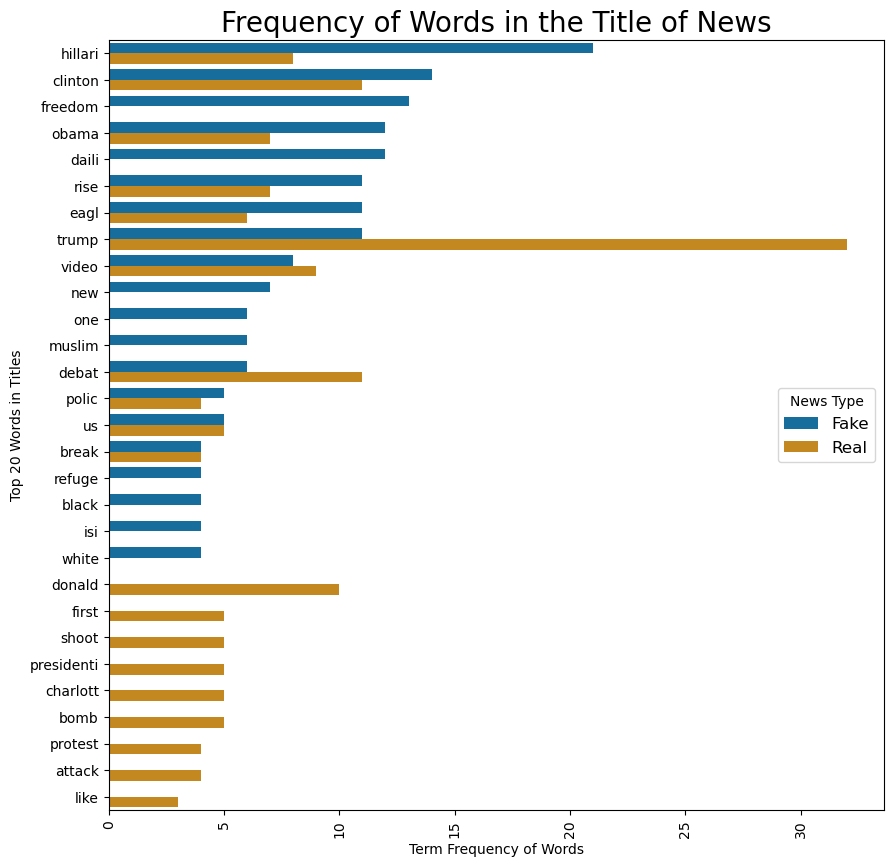

In [48]:
# https://www.geeksforgeeks.org/plotting-graph-using-seaborn-python/ solution found here

plt.figure(figsize=(10,10))
sns.barplot(y='Word', x='Frequency', data=top_news_title_df, hue='Type', palette='colorblind')
plt.xticks(rotation=90)
plt.xlabel('Term Frequency of Words', fontsize=10)
plt.ylabel('Top 20 Words in Titles', fontsize=10)
plt.legend(title='News Type', fontsize=12)
plt.title('Frequency of Words in the Title of News', fontsize=20)
plt.show()

Term Frequency Analysis shows different patterns in fake and real news titles. Fake news often mentions terms like "Hillary," "Clinton," "freedom," and "Obama," focusing on political figures. On the other hand, real news titles feature terms like "Trump," "Clinton," "Donald," and "debate," highlighting current events and political discussions related to the 2016 U.S. election. This difference in word usage indicates varying thematic priorities and narrative angles taken by news outlets, with fake news concentrating on political figures and real news emphasizing broader political discussions and events.  
The dataset provides information about the main topics and content of news articles that were shared on Facebook before the 2016 U.S. election. The prominence of specific terms in fake and real news titles highlights possible biases and divisions in news reporting during the election period. Additional analysis, like sentiment analysis or topic modeling, could offer more detailed understanding of the emotions and themes present in the news articles.

### Analysis of News Body

We now move on to analyzing the content of the news articles. Our focus is on identifying the top 50 significant words in both fake and real news articles. To do this, we use the "preprocess_text" function on the news article content, and then identify the 50 most common words in the news titles for both real and fake news. By plotting the term frequency of these words, we can visually compare the high-frequency words linked to fake and real news.

##### Fake News

In [53]:
# Initialize CountVectorizer for fake news body
cv_fake_body = CountVectorizer(analyzer=preprocess_text)
bow_fake_body = cv_fake_body.fit_transform(df_fake['text'])

In [54]:
# Get feature names and their frequencies directly from CountVectorizer
feature_names_fake_body = cv_fake_body.get_feature_names_out()
word_freq_fake_body = bow_fake_body.sum(axis=0).A1

In [55]:
# Sort the features by frequency
top_words_indices_fake_body = word_freq_fake_body.argsort()[::-1][:50]
top_words_fake_body = [feature_names_fake_body[i] for i in top_words_indices_fake_body]
top_frequencies_fake_body = word_freq_fake_body[top_words_indices_fake_body]

In [56]:
# Create DataFrame for top words in fake news body
top_fake_body_df = pd.DataFrame({'Word': top_words_fake_body, 'Frequency': top_frequencies_fake_body, 'Type': 'Fake'})

##### Real News

In [58]:
# Initialize CountVectorizer for real news body
cv_real_body = CountVectorizer(analyzer=preprocess_text)
bow_real_body = cv_real_body.fit_transform(df_real['text'])

In [59]:
# Get feature names and their frequencies directly from CountVectorizer
feature_names_real_body = cv_real_body.get_feature_names_out()
word_freq_real_body = bow_real_body.sum(axis=0).A1

In [60]:
# Sort the features by frequency
top_words_indices_real_body = word_freq_real_body.argsort()[::-1][:50]
top_words_real_body = [feature_names_real_body[i] for i in top_words_indices_real_body]
top_frequencies_real_body = word_freq_real_body[top_words_indices_real_body]

In [61]:
# Create DataFrame for top words in real news body
top_real_body_df = pd.DataFrame({'Word': top_words_real_body, 'Frequency': top_frequencies_real_body, 'Type': 'Real'})

##### Concatenation and Visualization

In [63]:
top_news_body_df = pd.concat([top_fake_body_df, top_real_body_df])

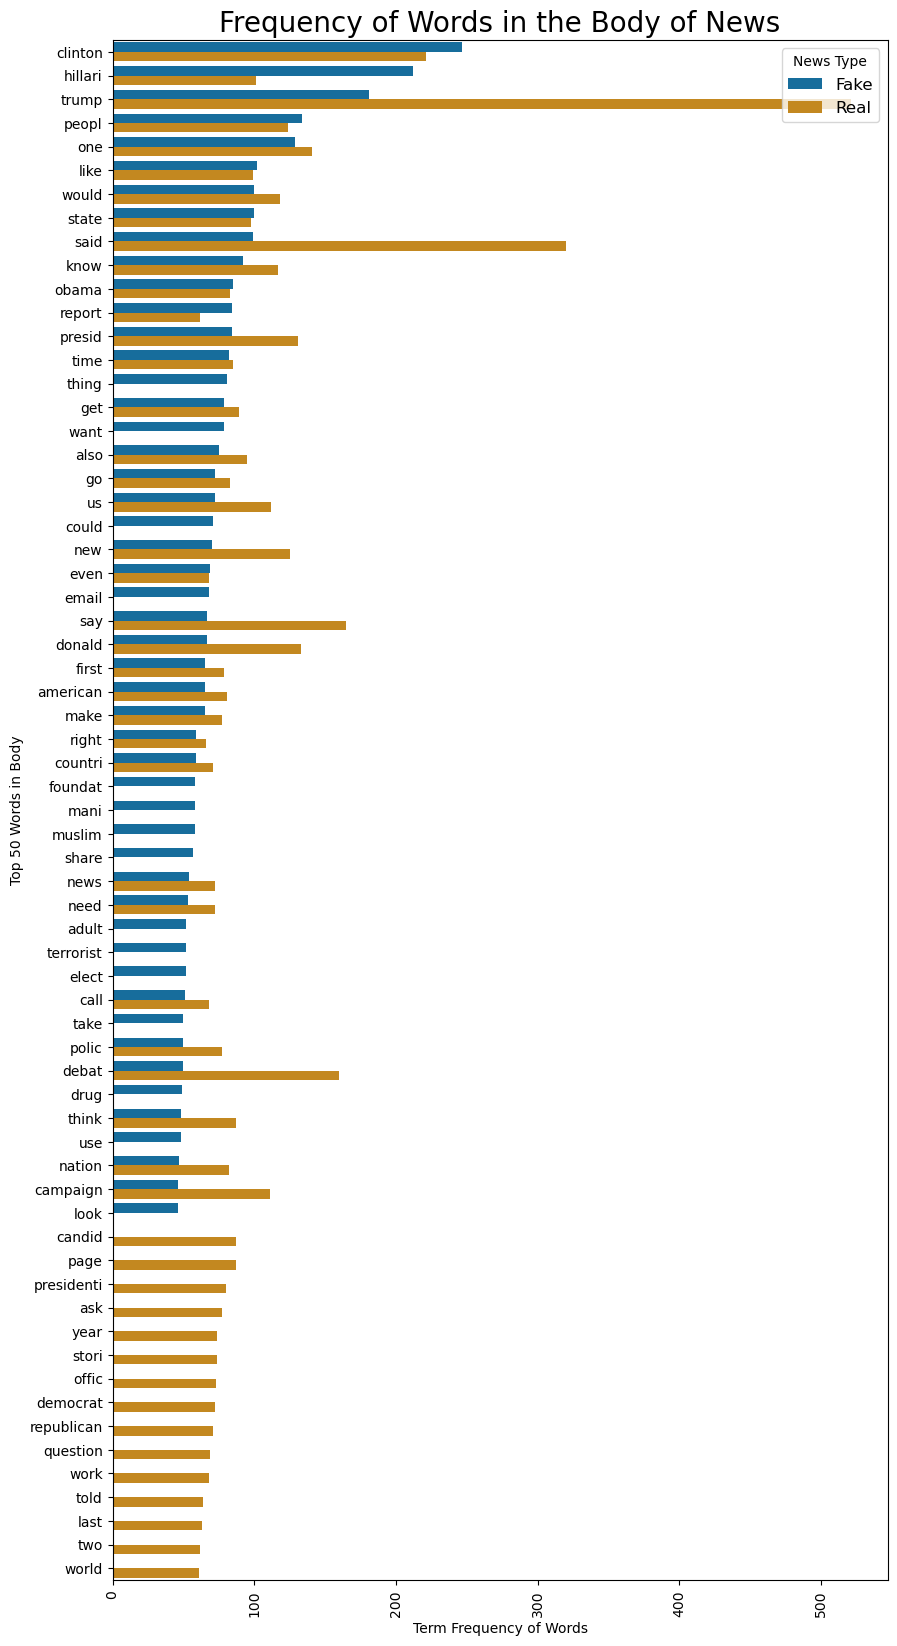

In [64]:
plt.figure(figsize=(10,20))
sns.barplot(y='Word', x='Frequency', data=top_news_body_df, hue='Type', palette='colorblind')
plt.xticks(rotation=90)
plt.xlabel('Term Frequency of Words', fontsize=10)
plt.ylabel('Top 50 Words in Body', fontsize=10)
plt.legend(title='News Type', fontsize=12)
plt.title('Frequency of Words in the Body of News', fontsize=20)
plt.show()

From the plot, it is evident that words such as "Trump" and "Clinton" dominate the frequency distribution in the news body. This suggests a significant focus on these political figures in the news articles. Furthermore, the term frequency analysis indicates distinct patterns between fake and real news. In fake news, terms like "Clinton," "Hillary," and "Trump" emerge as prominent, implying a strong bias towards political narratives involving these figures. Conversely, in real news, terms like "Trump," "said," and "Clinton" stand out, indicating a focus on factual reporting and discussions surrounding the statements made by political figures like Trump and Clinton.  
Additionally, it is interesting to note that terms like "Muslim" and "terrorist" exclusively appear in fabricated news articles, indicating a potential trend of sensationalism or prejudiced reporting aimed at inciting fear or prejudice. This emphasizes the importance of critically evaluating news sources and being aware of potential biases, particularly when dealing with sensitive topics like religion and terrorism.

### Analysis of Title Length

We analyzed the words in the news title and body. Now we want to determine if the length of the title is also a distinguishing factor between fake and real news.

##### Fake News

In [69]:
df['title_length']=df['title'].apply(lambda x: len(x))

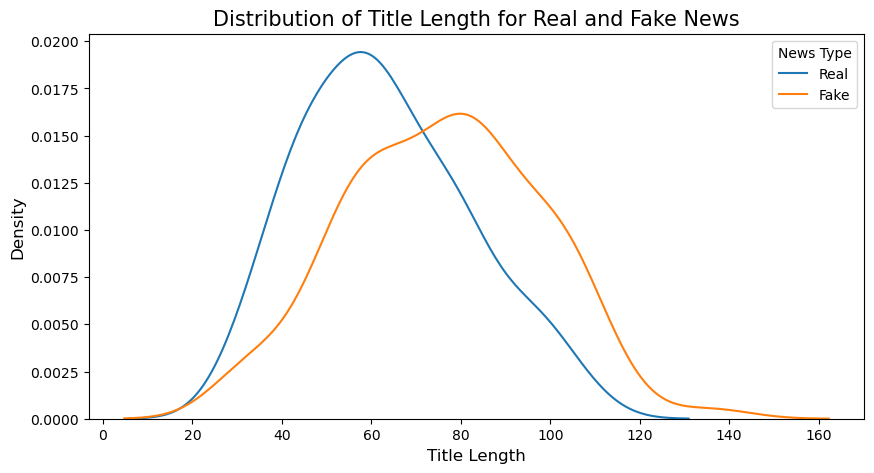

In [70]:
# https://www.geeksforgeeks.org/seaborn-kdeplot-a-comprehensive-guide/ solution found here

plt.figure(figsize=(10,5))
sns.kdeplot(df[df['news_type']=='Real']['title_length'])
sns.kdeplot(df[df['news_type']=='Fake']['title_length'])
plt.xlabel('Title Length',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.legend(title='News Type',fontsize=10,labels=['Real','Fake'])
plt.title('Distribution of Title Length for Real and Fake News',fontsize=15)
plt.show()

On average, fake news titles are a bit longer than real news titles. Real news titles usually have around 60 characters, showing a consistent pattern. However, fake news titles have a slight skewness, with the highest density around 80 characters. This difference in title length suggests that there may be variations in editorial styles or content emphasis between fake and real news articles.

## Fake/Real News Classification

### Fake/Real News Detection Based on News Body

In this part, we examine different machine learning methods to categorize news articles as either fake or real using only the content of the news body. First, we divide the dataset into training and testing sets. Then, we use Support Vector Machines, Naive Bayes classifiers, Random Forest Classifier, and Passive-Aggressive Classifiers to carry out the classification task.

#### Splitting Data into Train and Test Datasets

In [76]:
# Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['news_type'], test_size=0.2, random_state=42)

In [77]:
# Initialize CountVectorizer with preprocessing function
cv = CountVectorizer(analyzer=preprocess_text)
X_train_transformed = cv.fit_transform(X_train)
X_test_transformed = cv.transform(X_test)

#### Support Vector Machine

In [79]:
# https://analyticsindiamag.com/understanding-the-basics-of-svm-with-example-and-python-implementation/ solution found here

# Initialize Support Vector Machine classifier with linear kernel
svm_model = SVC(kernel='linear')
# Train the SVM model using the transformed training data
svm_model.fit(X_train_transformed, y_train)
# Use the trained SVM model to predict labels for the test data
svm_pred = svm_model.predict(X_test_transformed)

#### Naive Bayes Classifiers

In [81]:
# Initialize Naive Bayes classifier
nb_model = MultinomialNB()
# Train the Naive Bayes model using the transformed training data
nb_model.fit(X_train_transformed, y_train)
# Use the trained Naive Bayes model to predict labels for the test data
nb_pred = nb_model.predict(X_test_transformed)

#### Random Forest Classifier

In [83]:
# https://www.datacamp.com/tutorial/naive-bayes-scikit-learn solution found here

# Initialize Random Forest classifier with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the Random Forest model using the transformed training data
rf_model.fit(X_train_transformed, y_train)
# Use the trained Random Forest model to predict labels for the test data
rf_pred = rf_model.predict(X_test_transformed)

#### Passive-Aggressive Classifiers

In [85]:
# https://www.geeksforgeeks.org/passive-aggressive-classifiers/ solution found here

# Initialize Passive-Aggressive classifier with maximum iterations set to 1000
pa_model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
# Train the Passive-Aggressive model using the transformed training data
pa_model.fit(X_train_transformed, y_train)
# Use the trained Passive-Aggressive model to predict labels for the test data
pa_pred = pa_model.predict(X_test_transformed)

Evaluation

In [87]:
# https://builtin.com/data-science/evaluating-classification-models solution found here

# Evaluation
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='Fake')
    recall = recall_score(y_true, y_pred, pos_label='Fake')
    f1 = f1_score(y_true, y_pred, pos_label='Fake')
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1-score: {:.2f}".format(f1))

In [88]:
print("Support Vector Machine:")
evaluate_model(y_test, svm_pred)

print("\nNaive Bayes Classifier:")
evaluate_model(y_test, nb_pred)

print("\nRandom Forest Classifier:")
evaluate_model(y_test, rf_pred)

print("\nPassive-Aggressive Classifier:")
evaluate_model(y_test, pa_pred)

Support Vector Machine:
Accuracy: 0.81
Precision: 0.82
Recall: 0.78
F1-score: 0.80

Naive Bayes Classifier:
Accuracy: 0.73
Precision: 0.75
Recall: 0.67
F1-score: 0.71

Random Forest Classifier:
Accuracy: 0.78
Precision: 0.81
Recall: 0.72
F1-score: 0.76

Passive-Aggressive Classifier:
Accuracy: 0.76
Precision: 0.74
Recall: 0.78
F1-score: 0.76


**SVM is the top performer, offering the highest accuracy and a well-balanced mix of precision and recall. Nevertheless, the other classifiers also demonstrate competitive performance, with different trade-offs between precision and recall.**

### Fake/Real News Detection Based on News Title

In this section, our main goal is to determine whether news articles are fake or real based solely on their titles. Just like before, we divide the data into training and testing datasets. Then, we employ Support Vector Machines, Naive Bayes classifiers, Random Forest Classifier, and Passive-Aggressive Classifiers to classify the articles.

#### Splitting Data into Train and Test Datasets

In [93]:
# Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['news_type'], test_size=0.2, random_state=42)

In [94]:
# Initialize CountVectorizer with preprocessing function
cv = CountVectorizer(analyzer=preprocess_text)
X_train_transformed = cv.fit_transform(X_train)
X_test_transformed = cv.transform(X_test)

#### Support Vector Machine

In [96]:
# Initialize Support Vector Machine classifier with linear kernel
svm_model = SVC(kernel='linear', random_state=42)
# Train the SVM model using the transformed training data
svm_model.fit(X_train_transformed, y_train)
# Use the trained SVM model to predict labels for the test data
svm_pred = svm_model.predict(X_test_transformed)

#### Naive Bayes Classifiers

In [98]:
# Initialize Naive Bayes classifier
nb_model = MultinomialNB()
# Train the Naive Bayes model using the transformed training data
nb_model.fit(X_train_transformed, y_train)
# Use the trained Naive Bayes model to predict labels for the test data
nb_pred = nb_model.predict(X_test_transformed)

#### Random Forest Classifier

In [100]:
# Initialize Random Forest classifier with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the Random Forest model using the transformed training data
rf_model.fit(X_train_transformed, y_train)
# Use the trained Random Forest model to predict labels for the test data
rf_pred = rf_model.predict(X_test_transformed)

#### Passive-Aggressive Classifiers

In [102]:
# Initialize Passive-Aggressive classifier with maximum iterations set to 1000
pa_model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
# Train the Passive-Aggressive model using the transformed training data
pa_model.fit(X_train_transformed, y_train)
# Use the trained Passive-Aggressive model to predict labels for the test data
pa_pred = pa_model.predict(X_test_transformed)

#### Evaluation

In [104]:
print("Support Vector Machine:")
evaluate_model(y_test, svm_pred)

print("\nNaive Bayes Classifier:")
evaluate_model(y_test, nb_pred)

print("\nRandom Forest Classifier:")
evaluate_model(y_test, rf_pred)

print("\nPassive-Aggressive Classifier:")
evaluate_model(y_test, pa_pred)

Support Vector Machine:
Accuracy: 0.54
Precision: 0.53
Recall: 0.50
F1-score: 0.51

Naive Bayes Classifier:
Accuracy: 0.65
Precision: 0.60
Recall: 0.83
F1-score: 0.70

Random Forest Classifier:
Accuracy: 0.62
Precision: 0.75
Recall: 0.33
F1-score: 0.46

Passive-Aggressive Classifier:
Accuracy: 0.59
Precision: 0.57
Recall: 0.67
F1-score: 0.62


**The classifiers' performance varied when analyzing news titles. The Naive Bayes Classifier had the highest accuracy at 65%, with a precision of 60% and recall of 83%, resulting in an F1-score of 70%. However, the Support Vector Machine and Passive-Aggressive Classifier achieved lower accuracies of 54% and 59% respectively. The Support Vector Machine and Passive-Aggressive Classifier had F1-scores of 51% and 62% respectively. The Random Forest Classifier had an accuracy of 62%, with a precision of 75% and a recall of 33%, resulting in an F1-score of 46%. Overall, although the Naive Bayes Classifier performed relatively well, the Support Vector Machine and Passive-Aggressive Classifier showed lower performance in classifying news titles as fake or real.**

### Fake/Real News Detection Based on Both Body and Title of News

This section involves combining information from both the news body and title to classify news articles as fake or real. We follow the same procedure of splitting the data into train and test sets and then implement Support Vector Machines, Naive Bayes classifiers, Random Forest Classifier, and Passive-Aggressive Classifiers to achieve classification based on combined features.

#### Splitting Data into Train and Test Datasets

In [109]:
# Concatenate title and body into a single feature
df['text_combined'] = df['title'] + ' ' + df['text']

In [110]:
# Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df['text_combined'], df['news_type'], test_size=0.2, random_state=42)

In [111]:
# Initialize CountVectorizer with preprocessing function
cv = CountVectorizer(analyzer=preprocess_text)
X_train_transformed = cv.fit_transform(X_train)
X_test_transformed = cv.transform(X_test)

#### Support Vector Machine

In [113]:
# Initialize Support Vector Machine classifier with a linear kernel and set random state for reproducibility
svm_model = SVC(kernel='linear', random_state=42)
# Train the SVM model using the transformed training data
svm_model.fit(X_train_transformed, y_train)
# Use the trained SVM model to predict labels for the test data
svm_pred = svm_model.predict(X_test_transformed)

#### Naive Bayes Classifiers

In [115]:
# Initialize Naive Bayes classifier
nb_model = MultinomialNB()
# Train the Naive Bayes model using the transformed training data
nb_model.fit(X_train_transformed, y_train)
# Use the trained Naive Bayes model to predict labels for the test data
nb_pred = nb_model.predict(X_test_transformed)

#### Random Forest Classifier

In [117]:
# Initialize Random Forest classifier with 100 trees and set random state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the Random Forest model using the transformed training data
rf_model.fit(X_train_transformed, y_train)
# Use the trained Random Forest model to predict labels for the test data
rf_pred = rf_model.predict(X_test_transformed)

#### Passive-Aggressive Classifiers

In [119]:
# Initialize Passive-Aggressive classifier with maximum iterations set to 1000 and set random state for reproducibility
pa_model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
# Train the Passive-Aggressive model using the transformed training data
pa_model.fit(X_train_transformed, y_train)
# Use the trained Passive-Aggressive model to predict labels for the test data
pa_pred = pa_model.predict(X_test_transformed)

#### Evaluation

In [121]:
print("Support Vector Machine:")
evaluate_model(y_test, svm_pred)

print("\nNaive Bayes Classifier:")
evaluate_model(y_test, nb_pred)

print("\nRandom Forest Classifier:")
evaluate_model(y_test, rf_pred)

print("\nPassive-Aggressive Classifier:")
evaluate_model(y_test, pa_pred)

Support Vector Machine:
Accuracy: 0.81
Precision: 0.87
Recall: 0.72
F1-score: 0.79

Naive Bayes Classifier:
Accuracy: 0.73
Precision: 0.75
Recall: 0.67
F1-score: 0.71

Random Forest Classifier:
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-score: 0.78

Passive-Aggressive Classifier:
Accuracy: 0.81
Precision: 0.82
Recall: 0.78
F1-score: 0.80


**The Support Vector Machine and Passive-Aggressive Classifier had the best accuracy and F1-score among the models. SVM and Passive-Aggressive Classifier both had an accuracy of 81%, with precision scores of 87% and 82%. The Naive Bayes Classifier had a slightly lower accuracy of 73%, while the Random Forest Classifier had an accuracy of 78%. In conclusion, SVM and Passive-Aggressive Classifier performed well in classifying news articles as fake or real based on their content.**

## Conclusion

### Exploratory Data Analysis (EDA) Insights

- **Thematic Priorities:** The analysis of word frequencies in news titles showed that fake and real news have different thematic priorities. Fake news titles often highlighted political figures like "Hillary" and "Clinton," suggesting a focus on exaggerated political stories. On the other hand, real news titles focused on broader political discussions and events, featuring terms like "Trump" and "debate" prominently.
  
- **Narrative Angles:** The presence of specific terms in fake and real news titles indicated that news outlets adopt different narrative angles. Fake news tended to focus on political figures, while real news concentrated on reporting facts and discussing statements made by political figures.

- **Sensationalism and Prejudice:** Terms like "Muslim" and "terrorist" were exclusively associated with fabricated news articles, suggesting a potential trend of sensationalism or biased reporting aimed at provoking fear or prejudice. This emphasizes the importance of critically evaluating news sources, especially when it comes to sensitive topics.

- **Editorial Styles:** Analysis of title lengths suggested variations in editorial styles or content emphasis between fake and real news articles. Fake news titles were slightly longer on average, possibly reflecting a tendency towards more sensational or attention-grabbing headlines.

- **Consistency in Real News Titles:** Real news titles exhibited a consistent pattern of length, with the majority hovering around 60 characters. This consistency could imply a focus on clarity and conciseness in conveying news topics.



### Machine Learning Classification Performance

The evaluation of the machine learning classifiers for fake news detection yielded varying results based on different feature sets and classification approaches.

1. **Fake/Real News Detection Based on News Body:**
    - Support Vector Machine (SVM) exhibited the highest accuracy at 81%, with a balanced precision and recall (F1-score: 80%).
    - Naive Bayes Classifier achieved an accuracy of 73%, with relatively lower precision and recall (F1-score: 71%).
    - Random Forest Classifier and Passive-Aggressive Classifier performed moderately well, with accuracies of 78% and 76% respectively.

2. **Fake/Real News Detection Based on News Title:**
    - Naive Bayes Classifier showed the highest accuracy at 65%, with a notable precision-recall trade-off (F1-score: 70%).
    - SVM and Passive-Aggressive Classifier had lower accuracies at 54% and 59% respectively, indicating challenges in classifying news based solely on titles.
    - Random Forest Classifier exhibited an accuracy of 62% with a lower F1-score of 46%.

3. **Fake/Real News Detection Based on Both Body and Title of News:**
    - SVM and Passive-Aggressive Classifier demonstrated the highest accuracy at 81%, with robust precision and recall scores (F1-score: 79% and 80% respectively).
    - Naive Bayes Classifier achieved an accuracy of 73% with a balanced precision-recall performance (F1-score: 71%).
    - Random Forest Classifier maintained a reasonable accuracy of 78%, with consistent precision and recall (F1-score: 78%).
  
The results highlight how crucial it is to choose the right features and models when dealing with the challenging job of detecting fake news. Improving and experimenting with different feature engineering methods could boost the performance of classifiers, making social media news verification systems more efficient.

### Implications and Future Directions

#### Implications

- **Media Literacy:** It is crucial to have media literacy skills to distinguish between fake and real news in today's fast-changing digital media world.

- **Editorial Responsibility:** The differences in themes and editorial styles between fake and real news show how editorial choices can influence public opinions and stories.

#### Future Directions

- **Advanced Classification Techniques:** Future studies may investigate sophisticated classification methods like deep learning models or ensemble techniques to enhance the precision and resilience of fake news detection algorithms.

- **Multimodal Analysis:** Incorporating extra elements like metadata, social media engagement metrics, or image analysis could boost the thoroughness and dependability of fake news detection systems

- **Real-time Monitoring:** Implementing developed models for real-time monitoring of news feeds could assist in early identification and reduction of fake news spread, supporting the overall initiatives in fighting misinformation and upholding media integrity.

## References

- Shu, K., Mahudeswaran, D., Wang, S., Lee, D., & Liu, H. (2018). FakeNewsNet: A Data Repository with News Content, Social Context and Dynamic Information for Studying Fake News on Social Media. arXiv:1809.01286.
- Shu, K., Sliva, A., Wang, S., Tang, J., & Liu, H. (2017). Fake News Detection on Social Media: A Data Mining Perspective. ACM SIGKDD Explorations Newsletter, 19(1), 22-36.
- Shu, K., Wang, S., & Liu, H. (2017). Exploiting Tri-Relationship for Fake News Detection. arXiv:1712.07709.